## 소상공인시장진흥공단 상가업소정보로 편의점(cu, gs25) 입점분석

* https://www.thebell.co.kr/free/content/ArticleView.asp?key=202005081022015920105212&lcode=00
* 편의점 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

* GS25 편의점 : http://gs25.gsretail.com/gscvs/ko/main?inputServerSessionFlag=true&resultCode=E104&resultMsg=Bad%20Request%20Error%20.%20Request%20Data%20:%20SSO%20Cookie%20is%20Empty.&ssoAuthToken=
* CU 편의점 : https://www.bgfretail.com/
### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 데이터 정리하기


### 필요한 라이브러리 불러오기

In [1]:
# pandas, numpy, seaborn을 불러옵니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#!pip install folium
import folium
# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

### 시각화를 위한 한글폰트 설정하기

In [2]:
import platform
platform.system()

'Windows'

In [3]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":    # 윈도우 운영체제일 경우 맑은고딕으로 설정
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

In [4]:
# Win
# plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [5]:
# 폰트가 선명하게 보이도록 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

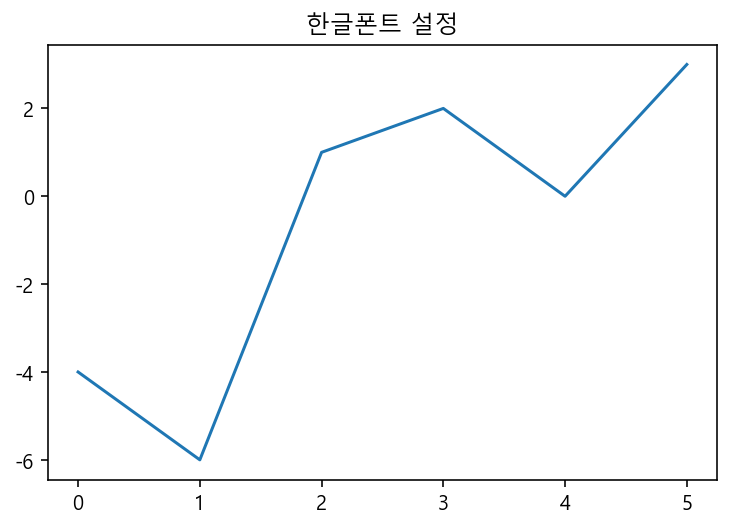

In [6]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 0, 3])

---

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [7]:
# 1. 2019년 3월 

open('data/소상공인시장진흥공단_상가업소정보_201903_01.csv', 'rt', encoding='UTF8')

<_io.TextIOWrapper name='data/소상공인시장진흥공단_상가업소정보_201903_01.csv' mode='rt' encoding='UTF8'>

In [8]:
# 파일을 불러와 df 라는 변수에 담습니다.

# 2019년 3월 데이터
rawdata19 = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_201903_01.csv")

print(rawdata19. shape)
rawdata19.head(2)

(539761, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [9]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

data19 = rawdata19[columns].copy()
print(data19.shape)
data19.head(2)

(539761, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
1,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [10]:
# 2019년 부산광역시 편의점 점포
busan19 = data19[(data19.시도명=='부산광역시') & (data19.상권업종소분류명=='편의점')]
print(busan19.shape)
busan19.head()

(2881, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
223,코리아세븐하단제휴점,소매,종합소매점,편의점,부산광역시,사하구,하단2동,하단동,부산광역시 사하구 낙동대로 474,128.968208,35.107159
569,GS25해운리베라,소매,종합소매점,편의점,부산광역시,해운대구,중1동,중동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
679,미니스톱반송삼한점,소매,종합소매점,편의점,부산광역시,해운대구,반송2동,반송동,부산광역시 해운대구 신반송로 168,129.161280,35.228781
1023,GS25당리행운점,소매,종합소매점,편의점,부산광역시,사하구,당리동,당리동,부산광역시 사하구 낙동대로450번길 2,128.969877,35.105424
1153,GS25,소매,종합소매점,편의점,부산광역시,사상구,학장동,학장동,부산광역시 사상구 가야대로176번길 24,128.991098,35.148573


In [11]:
# 2019년 1분기 CU
cu19 = busan19[busan19.상호명.str.contains('CU')]
print(cu19.shape)
cu19.head()

(768, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
10039,CU,소매,종합소매점,편의점,부산광역시,부산진구,전포2동,전포동,부산광역시 부산진구 동성로 99-2,129.067599,35.159272
25165,CU하단로또일등점,소매,종합소매점,편의점,부산광역시,사하구,하단2동,하단동,부산광역시 사하구 낙동대로 501,128.966124,35.108951
26815,CU,소매,종합소매점,편의점,부산광역시,수영구,남천1동,남천동,부산광역시 수영구 수영로388번길 37,129.108795,35.140081
27597,CU기계공구단지본관점,소매,종합소매점,편의점,부산광역시,강서구,대저2동,대저2동,부산광역시 강서구 유통단지1로 41,128.955726,35.167309
27634,CU강서미음점,소매,종합소매점,편의점,부산광역시,강서구,녹산동,구랑동,부산광역시 강서구 미음산단2로16번길 46,128.854070,35.127766


In [12]:
# 2019년 1분기 GS25
gs19 = busan19[busan19.상호명.str.contains('GS')]
print(gs19.shape)
gs19.head()

(698, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
569,GS25해운리베라,소매,종합소매점,편의점,부산광역시,해운대구,중1동,중동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
1023,GS25당리행운점,소매,종합소매점,편의점,부산광역시,사하구,당리동,당리동,부산광역시 사하구 낙동대로450번길 2,128.969877,35.105424
1153,GS25,소매,종합소매점,편의점,부산광역시,사상구,학장동,학장동,부산광역시 사상구 가야대로176번길 24,128.991098,35.148573
1925,GS25부곡점,소매,종합소매점,편의점,부산광역시,금정구,부곡2동,부곡동,부산광역시 금정구 부곡로141번길 10,129.091721,35.228752
6568,GS25영도한진,소매,종합소매점,편의점,부산광역시,영도구,청학1동,청학동,부산광역시 영도구 태종로 232,129.053365,35.095460


---

In [13]:
# 2. 2020년 3월 

open('data/상가업소정보_부산_202003.csv', 'rt', encoding='UTF8')

<_io.TextIOWrapper name='data/상가업소정보_부산_202003.csv' mode='rt' encoding='UTF8'>

In [14]:
# 2020년 3월 데이터
rawdata20 = pd.read_csv('data/상가업소정보_부산_202003.csv', sep='|')

print(rawdata20. shape)
rawdata20.head(2)

(160843, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
1,20047434,경부할인마트,NaN,D,소매,D03,종합소매점,D03A06,종합소매,G47190,...,2617010100107940681015812,NaN,부산광역시 동구 망양로 593,601831,48716.0,NaN,1,NaN,129.034599,35.123196


In [15]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

data20 = rawdata20[columns].copy()
print(data20.shape)
data20.head(2)

(160843, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
1,경부할인마트,소매,종합소매점,종합소매,부산광역시,동구,초량6동,초량동,부산광역시 동구 망양로 593,129.034599,35.123196


In [16]:
# 2020년 부산광역시 편의점 점포
busan20 = data20[(data20.시도명=='부산광역시') & (data20.상권업종소분류명=='편의점')]
print(busan20.shape)
busan20.head()

(2927, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
95,코리아세븐하단제휴점,소매,종합소매점,편의점,부산광역시,사하구,하단2동,하단동,부산광역시 사하구 낙동대로 474,128.968208,35.107159
200,GS25해운리베라,소매,종합소매점,편의점,부산광역시,해운대구,중1동,중동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
225,미니스톱반송삼한점,소매,종합소매점,편의점,부산광역시,해운대구,반송2동,반송동,부산광역시 해운대구 신반송로 168,129.161280,35.228781
272,GS25,소매,종합소매점,편의점,부산광역시,사상구,학장동,학장동,부산광역시 사상구 가야대로176번길 24,128.991098,35.148573
325,GS25당리행운점,소매,종합소매점,편의점,부산광역시,사하구,당리동,당리동,부산광역시 사하구 낙동대로450번길 2,128.969877,35.105424


In [17]:
# 2020년 1분기 CU
cu20 = busan20[busan20.상호명.str.contains('CU')]
print(cu20.shape)
cu20.head()

(778, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
3367,CU,소매,종합소매점,편의점,부산광역시,부산진구,전포2동,전포동,부산광역시 부산진구 동성로 99-2,129.067599,35.159272
5203,CU,소매,종합소매점,편의점,부산광역시,영도구,남항동,대교동2가,부산광역시 영도구 태종로 97,129.041505,35.091723
7585,CU하단로또일등점,소매,종합소매점,편의점,부산광역시,사하구,하단2동,하단동,부산광역시 사하구 낙동대로 501,128.966124,35.108951
8048,CU,소매,종합소매점,편의점,부산광역시,수영구,남천1동,남천동,부산광역시 수영구 수영로388번길 37,129.108795,35.140081
8230,CU기계공구단지본관점,소매,종합소매점,편의점,부산광역시,강서구,대저2동,대저2동,부산광역시 강서구 유통단지1로 41,128.955726,35.167309


In [18]:
# 2020년 1분기 GS25
gs20 = busan20[busan20.상호명.str.contains('GS')]
print(gs20.shape)
gs20.head()

(712, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
200,GS25해운리베라,소매,종합소매점,편의점,부산광역시,해운대구,중1동,중동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
272,GS25,소매,종합소매점,편의점,부산광역시,사상구,학장동,학장동,부산광역시 사상구 가야대로176번길 24,128.991098,35.148573
325,GS25당리행운점,소매,종합소매점,편의점,부산광역시,사하구,당리동,당리동,부산광역시 사하구 낙동대로450번길 2,128.969877,35.105424
560,GS25부곡점,소매,종합소매점,편의점,부산광역시,금정구,부곡2동,부곡동,부산광역시 금정구 부곡로141번길 10,129.091721,35.228752
2313,GS25영도한진,소매,종합소매점,편의점,부산광역시,영도구,청학1동,청학동,부산광역시 영도구 태종로 232,129.053365,35.095460


---

In [19]:
# 3. 2022년 3월 

open('data/소상공인시장진흥공단_상가(상권)정보_부산_202203.csv', 'rt', encoding='UTF8')

<_io.TextIOWrapper name='data/소상공인시장진흥공단_상가(상권)정보_부산_202203.csv' mode='rt' encoding='UTF8'>

In [20]:
# 2022년 3월 데이터
rawdata22 = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202203.csv')

print(rawdata22. shape)
rawdata22.head(2)

(147799, 39)


C:\Users\hmkim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267


In [21]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

data22 = rawdata22[columns].copy()
print(data22.shape)
data22.head(2)

(147799, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
1,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,부산광역시 동래구 동래로147번길 18,129.087156,35.205267


In [22]:
# 2022년 부산광역시 편의점 점포
busan22 = data22[(data22.시도명=='부산광역시') & (data22.상권업종소분류명=='편의점')]
print(busan22.shape)
busan22.head()

(2549, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
84,GS25정관에이타워점,소매,종합소매점,편의점,부산광역시,기장군,정관읍,정관읍,부산광역시 기장군 정관읍 정관7로 17-3,129.176985,35.321974
91,포시즌편의점,소매,종합소매점,편의점,부산광역시,북구,화명3동,화명동,부산광역시 북구 금곡대로303번길 61,129.010306,35.235660
143,보광훼미리마트민락,소매,종합소매점,편의점,부산광역시,수영구,민락동,민락동,부산광역시 수영구 광남로 248,129.125837,35.159222
200,세븐일레븐부산강서명지점,소매,종합소매점,편의점,부산광역시,강서구,명지1동,명지동,부산광역시 강서구 명지새동네길1번길 2,128.931019,35.108694
211,코리아세븐부산,소매,종합소매점,편의점,부산광역시,부산진구,개금1동,개금동,부산광역시 부산진구 엄광로 62,129.022960,35.147894


In [23]:
# 2020년 1분기 CU
cu22 = busan22[busan22.상호명.str.contains('CU')]
print(cu22.shape)
cu22.head()

(739, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
350,CU,소매,종합소매점,편의점,부산광역시,연제구,연산5동,연산동,부산광역시 연제구 중앙대로 999,129.074512,35.179123
780,보드게임CUBE,소매,종합소매점,편의점,부산광역시,부산진구,양정1동,양정동,부산광역시 부산진구 양지로5번길 19,129.070019,35.170527
994,CU,소매,종합소매점,편의점,부산광역시,남구,용호4동,용호동,부산광역시 남구 용호로 254,129.111499,35.109706
1325,CU,소매,종합소매점,편의점,부산광역시,수영구,망미2동,망미동,부산광역시 수영구 수미로41번길 3,129.115234,35.173707
1549,CU,소매,종합소매점,편의점,부산광역시,북구,금곡동,금곡동,부산광역시 북구 금곡대로616번길 57,129.016023,35.263285


In [24]:
# 2020년 1분기 GS25
gs22 = busan22[busan22.상호명.str.contains('GS')]
print(gs22.shape)
gs22.head()

(604, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
84,GS25정관에이타워점,소매,종합소매점,편의점,부산광역시,기장군,정관읍,정관읍,부산광역시 기장군 정관읍 정관7로 17-3,129.176985,35.321974
328,GS25해운리베라,소매,종합소매점,편의점,부산광역시,해운대구,중1동,중동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
627,GS25,소매,종합소매점,편의점,부산광역시,해운대구,우2동,우동,부산광역시 해운대구 APEC로 55,129.136039,35.169079
817,GS25시,소매,종합소매점,편의점,부산광역시,사하구,장림2동,장림동,부산광역시 사하구 을숙도대로 662,128.977848,35.084879
1526,GS정관달산점,소매,종합소매점,편의점,부산광역시,기장군,정관읍,정관읍,부산광역시 기장군 정관읍 산단7로 8-12,129.203683,35.320143


---

In [25]:
print('<점포 수 추이>')

print('전체:', busan19.shape[0], busan20.shape[0], busan22.shape[0])
print('CU:  ', cu19.shape[0], cu20.shape[0], cu22.shape[0])
print('GS:  ', gs19.shape[0], gs20.shape[0], gs22.shape[0])

<점포 수 추이>
전체: 2881 2927 2549
CU:   768 778 739
GS:   698 712 604


In [26]:
print(768/2881, 778/2927, 739/2549)
print(698/2881, 712/2927, 604/2549)

0.26657410621312044 0.2658011615989067 0.2899176147508827
0.24227698715723708 0.24325247693884525 0.2369556688897607


2019 -> 2020: 코로나의 영향은 아직 크게 잘 모르겠음
2022에는 왜 많이 줄었을까? 다른 원인?
GS가 특히 더 준 이유?


코로나 이전엔 입지 마케팅에 더 비중
돌발상황 발생
CU는 손해를 봤어도 입지 마케팅을 계속 유지하는 것 같음
GS는 어떤 전략? 왜 점포수가 더 줄었을까? 입지보다 더 중요해진 마케팅 요소가 생겼을 수도

부산 지역적 특성

경쟁사: 세븐일레븐 미니스탑 흡수

## 뉴스기사 내용을 바탕으로 편의점(GS, CU)의 입지 마케팅 입증하기

* https://www.thebell.co.kr/free/content/ArticleView.asp?key=202005081022015920105212&lcode=00

입지마케팅의 변화, 흐름을 확인
추가적인 데이터 및 자료 검색

1. 진짜 기사대로 입지되어있는가?
2. 시간의 흐름에 따라서 변화한 추세 확인, 변화 요인은?

**1. 2019년 지도 시각화**

In [27]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리를 활용하세요.
import folium

In [28]:
# 맵 생성을 위한 경도, 위도 임의 기준 선정
x = cu19.위도.mean()
y = cu19.경도.mean()

In [29]:
# 2019년 전체 위치 나타낼 맵 생성
map19 = folium.Map([x, y], zoom_start=10)

In [30]:
# map19에 CU, GS25 마커 생성
for index, row in cu19.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = row['상호명'],
                  tooltip = row['행정동명'],
                  icon = folium.Icon(color='purple')
                 ).add_to(map19)

for index, row in gs19.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = row['상호명'],
                  tooltip = row['행정동명'],
                  icon = folium.Icon(color='blue')
                 ).add_to(map19)

In [31]:
map19

In [32]:
map22

NameError: name 'map22' is not defined

In [ ]:
# 클러스터로 볼 맵 생성
cluster_map19 = folium.Map([x, y], zoom_start=10)

# 클러스터 패키지 설치
from folium.plugins import MarkerCluster

# 편의점별 클러스터 생성
cu19_cluster = MarkerCluster(name='2019년 CU').add_to(cluster_map19)
gs19_cluster = MarkerCluster(name='2019년 GS25').add_to(cluster_map19)

In [ ]:
# 클러스터별 마커 생성
for x, y, name, location in zip(cu19['위도'], cu19['경도'], cu19['상호명'], cu19['행정동명']):
    folium.Marker([x, y],
                  icon = folium.Icon(color='purple'),
                  popup = name,
                  tooltip = location
                 ).add_to(cu19_cluster)

for x, y, name, location in zip(gs19['위도'], gs19['경도'], gs19['상호명'], gs19['행정동명']):
    folium.Marker([x, y],
                  icon = folium.Icon(color='blue'),
                  popup = name,
                  tooltip = location
                 ).add_to(gs19_cluster)

# 레이어 구분
folium.LayerControl().add_to(cluster_map19)

In [ ]:
cluster_map19

---

**2. 2020년 지도 시각화**

In [ ]:
# 2020년 전체 위치 나타낼 맵 생성
map20 = folium.Map([x, y], zoom_start=10)

In [ ]:
# map20에 CU, GS25 마커 생성
for index, row in cu20.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = row['상호명'],
                  tooltip = row['행정동명'],
                  icon = folium.Icon(color='purple')
                 ).add_to(map20)

for index, row in gs20.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = row['상호명'],
                  tooltip = row['행정동명'],
                  icon = folium.Icon(color='blue')
                 ).add_to(map20)

In [ ]:
map20

In [ ]:
# 클러스터로 볼 맵 생성
cluster_map20 = folium.Map([x, y], zoom_start=10)

# 편의점별 클러스터 생성
cu20_cluster = MarkerCluster(name='2020년 CU').add_to(cluster_map20)
gs20_cluster = MarkerCluster(name='2020년 GS25').add_to(cluster_map20)

In [ ]:
# 클러스터별 마커 생성
for x, y, name, location in zip(cu20['위도'], cu20['경도'], cu20['상호명'], cu20['행정동명']):
    folium.Marker([x, y],
                  icon = folium.Icon(color='purple'),
                  popup = name,
                  tooltip = location
                 ).add_to(cu20_cluster)

for x, y, name, location in zip(gs20['위도'], gs20['경도'], gs20['상호명'], gs20['행정동명']):
    folium.Marker([x, y],
                  icon = folium.Icon(color='blue'),
                  popup = name,
                  tooltip = location
                 ).add_to(gs20_cluster)

# 레이어 구분
folium.LayerControl().add_to(cluster_map20)

In [ ]:
cluster_map20

---

**3. 2022년 지도 시각화**

In [ ]:
# 2022년 전체 위치 나타낼 맵 생성
map22 = folium.Map([x, y], zoom_start=10)

In [ ]:
# map20에 CU, GS25 마커 생성
for index, row in cu22.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = row['상호명'],
                  tooltip = row['행정동명'],
                  icon = folium.Icon(color='purple')
                 ).add_to(map22)

for index, row in gs22.iterrows():
    folium.Marker(location = [row['위도'], row['경도']],
                  popup = row['상호명'],
                  tooltip = row['행정동명'],
                  icon = folium.Icon(color='blue')
                 ).add_to(map22)

In [ ]:
map22

In [ ]:
# 클러스터로 볼 맵 생성
cluster_map22 = folium.Map([x, y], zoom_start=10)

# 편의점별 클러스터 생성
cu22_cluster = MarkerCluster(name='2022년 CU').add_to(cluster_map22)
gs22_cluster = MarkerCluster(name='2022년 GS25').add_to(cluster_map22)

In [ ]:
# 클러스터별 마커 생성
for x, y, name, location in zip(cu22['위도'], cu22['경도'], cu22['상호명'], cu22['행정동명']):
    folium.Marker([x, y],
                  icon = folium.Icon(color='purple'),
                  popup = name,
                  tooltip = location
                 ).add_to(cu22_cluster)

for x, y, name, location in zip(gs22['위도'], gs22['경도'], gs22['상호명'], gs22['행정동명']):
    folium.Marker([x, y],
                  icon = folium.Icon(color='blue'),
                  popup = name,
                  tooltip = location
                 ).add_to(gs22_cluster)

# 레이어 구분
folium.LayerControl().add_to(cluster_map22)

In [ ]:
cluster_map22

---

**4. 점포 수 변화**

In [ ]:
# 정렬을 위한 구 리스트. 인구순
gu_list = ['해운대구', '부산진구', '사하구', '북구', '동래구', '남구', '금정구',
           '사상구', '연제구', '기장군', '수영구', '강서구', '영도구', '서구',
           '동구', '중구']

In [ ]:
cu19.groupby('시군구명').count().reindex(gu_list)[['상호명']].T

In [ ]:
cu20.groupby('시군구명').count().reindex(gu_list)[['상호명']].T

In [ ]:
cu22.groupby('시군구명').count().reindex(gu_list)[['상호명']].T

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=cu19, x='시군구명', color='red', alpha=0.3, order=gu_list)
#sns.countplot(data=cu20, x='시군구명', color='orange', alpha=0.3, order=gu_list)
sns.countplot(data=cu22, x='시군구명', color='green', alpha=0.3, order=gu_list)

In [ ]:
gs19.groupby('시군구명').count().reindex(gu_list)[['상호명']].T

In [ ]:
gs20.groupby('시군구명').count().reindex(gu_list)[['상호명']].T

In [ ]:
gs22.groupby('시군구명').count().reindex(gu_list)[['상호명']].T

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=gs19, x='시군구명', color='red', alpha=0.3, order=gu_list)
#sns.countplot(data=gs20, x='시군구명', color='orange', alpha=0.3, order=gu_list)
sns.countplot(data=gs22, x='시군구명', color='green', alpha=0.3, order=gu_list)

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=cu19[cu19.시군구명=='동구'], x='행정동명', color='red', alpha=0.3)
sns.countplot(data=cu22[cu22.시군구명=='동구'], x='행정동명', color='green', alpha=0.3)

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=gs19[gs19.시군구명=='동구'], x='행정동명', color='red', alpha=0.3)
sns.countplot(data=gs22[gs22.시군구명=='동구'], x='행정동명', color='green', alpha=0.3)